In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')


In [4]:
#Loading the dataset
heart_df = pd.read_csv("Heart-Failure.csv")

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Data Preprocessing

In [7]:
#Checking for null values
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
#Checking for duplicated 
heart_df.duplicated().sum()

0

In [9]:
#Checking number of unique value in each feature
heart_df.nunique().sort_values(ascending=False)

Cholesterol       222
MaxHR             119
RestingBP          67
Oldpeak            53
Age                50
ChestPainType       4
RestingECG          3
ST_Slope            3
Sex                 2
FastingBS           2
ExerciseAngina      2
HeartDisease        2
dtype: int64

Check and Separate Categorical Variables values

In [10]:
#Check values and their count in the columns
cat_col = []
for col in heart_df.select_dtypes(include= 'object' ).columns:
    if heart_df[col].nunique() < 8:  
        print(heart_df[col].value_counts())
        print('-'*90)
        cat_col.append(col)
        

M    725
F    193
Name: Sex, dtype: int64
------------------------------------------------------------------------------------------
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
------------------------------------------------------------------------------------------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
------------------------------------------------------------------------------------------
N    547
Y    371
Name: ExerciseAngina, dtype: int64
------------------------------------------------------------------------------------------
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
------------------------------------------------------------------------------------------


Convert (Replace) Categorical Variables to Numeric
Sex : M = 0 , F = 1
ChestPainType : ATA = 0 , NAP = 1, ASY = 2, TA = 3
RestingECG : Normal = 0 , ST = 1, LVH = 2
ExerciseAngina : N = 0 , Y = 1
ST_Slope : Up = 0, Flat = 1, Down = 2

In [11]:
for col in cat_col:
    print(col)
    print((heart_df[col].unique()),list(range(heart_df[col].nunique())))
    heart_df[col].replace((heart_df[col].unique()), range(heart_df[col].nunique()), inplace=True)
    print('-'*90)

Sex
['M' 'F'] [0, 1]
------------------------------------------------------------------------------------------
ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] [0, 1, 2, 3]
------------------------------------------------------------------------------------------
RestingECG
['Normal' 'ST' 'LVH'] [0, 1, 2]
------------------------------------------------------------------------------------------
ExerciseAngina
['N' 'Y'] [0, 1]
------------------------------------------------------------------------------------------
ST_Slope
['Up' 'Flat' 'Down'] [0, 1, 2]
------------------------------------------------------------------------------------------


In [12]:
heart_df['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

Impute the 0 values (cholesterol) with KNN

In [13]:
from sklearn.impute import KNNImputer
heart_df['Cholesterol'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(heart_df)
heart_df = pd. DataFrame(after_impute, columns=heart_df.columns)


In [14]:
selected_Col = heart_df.columns
selected_Col = selected_Col.drop('Oldpeak')
heart_df[selected_Col] = heart_df[selected_Col].astype('int32')

Exploratory Data Analysis

<Axes: >

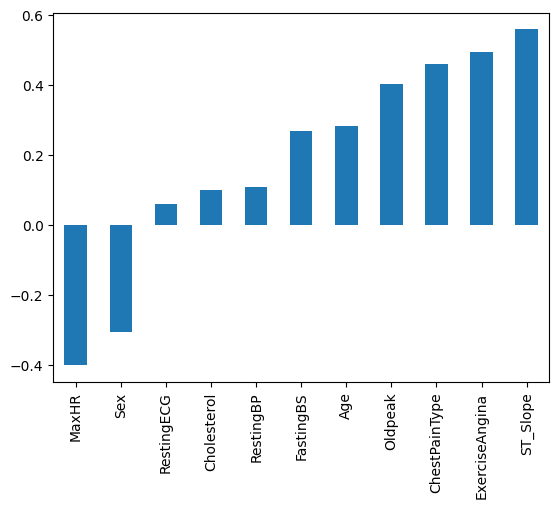

In [15]:
heart_df.corr()['HeartDisease'][:-1].sort_values().plot(kind='bar')

HeartDisease Percentage

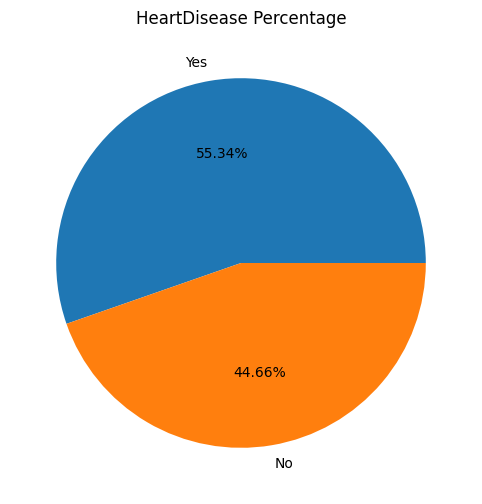

In [16]:
#Plot pie chart to show HeartDisease Percentage
plt.figure(figsize=(10,6))
plt.pie(heart_df['HeartDisease'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('HeartDisease Percentage')
plt.show()

Gender and Heart Disease


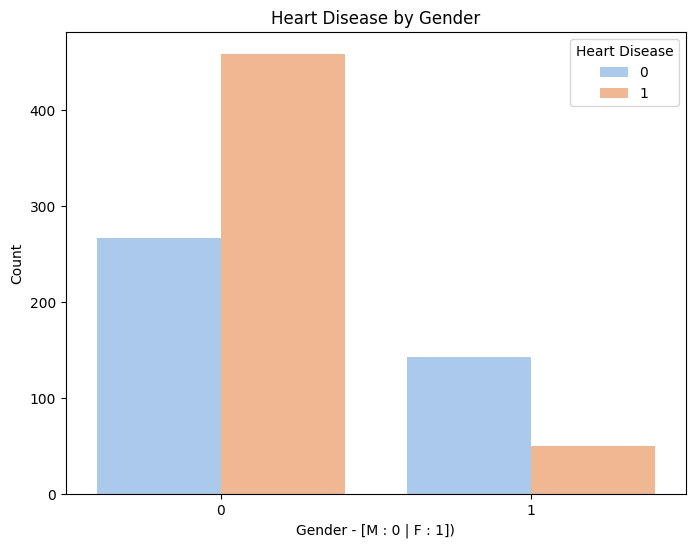

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_df, x='Sex', hue='HeartDisease', palette='pastel')
plt.title('Heart Disease by Gender')
plt.xlabel('Gender - [M : 0 | F : 1])')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['0', '1'])
plt.show()

Countplot shows strange relation between Gender and HeartDisease.Men have a higher risk of HeartDisease

Age Distribution

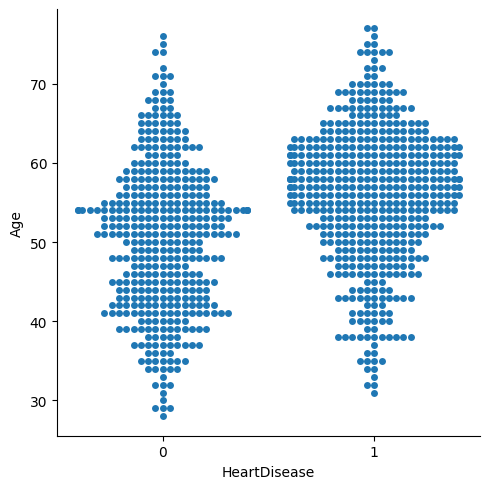

In [22]:
#catplot for age distribution
sns.catplot(x="HeartDisease", y="Age", kind="swarm", data=heart_df)


<Axes: xlabel='Age', ylabel='Count'>

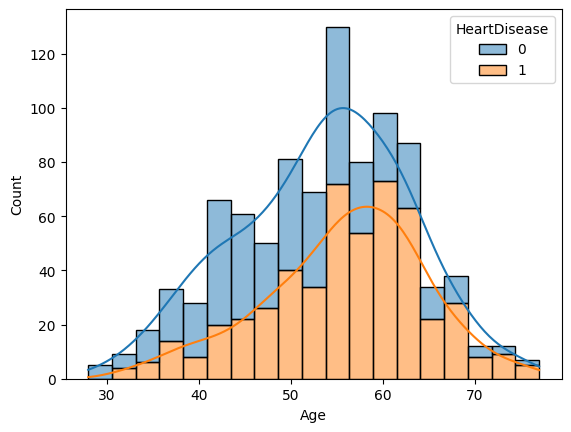

In [23]:
#histogram for age distribution
sns.histplot(data=heart_df, x="Age", hue="HeartDisease", multiple="stack",kde=True)


ChestPainType and Heart Disease

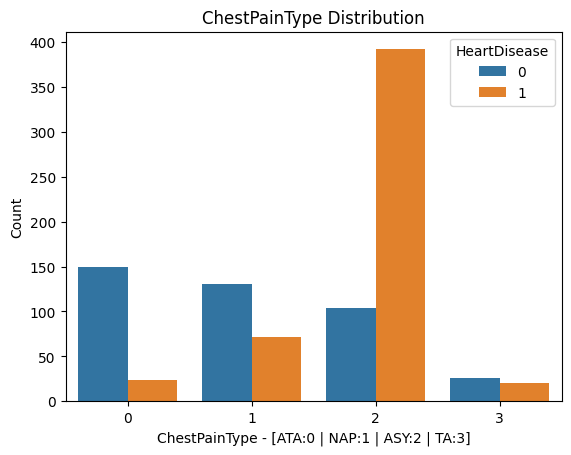

In [24]:
sns.countplot(x='ChestPainType', data=heart_df, hue='HeartDisease')
plt.title('ChestPainType Distribution')
plt.xlabel('ChestPainType - [ATA:0 | NAP:1 | ASY:2 | TA:3]')
plt.ylabel('Count')
plt.show()

FastingBS and Heart Disease

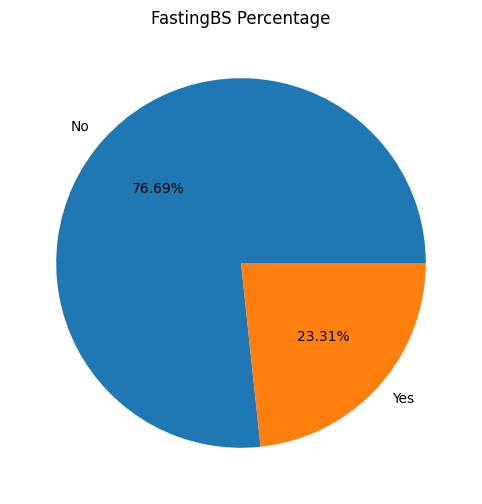

In [25]:
#Plot pie chart to show FastingBS Percentage
plt.figure(figsize=(10,6))
plt.pie(heart_df['FastingBS'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%')
plt.title('FastingBS Percentage')
plt.show()


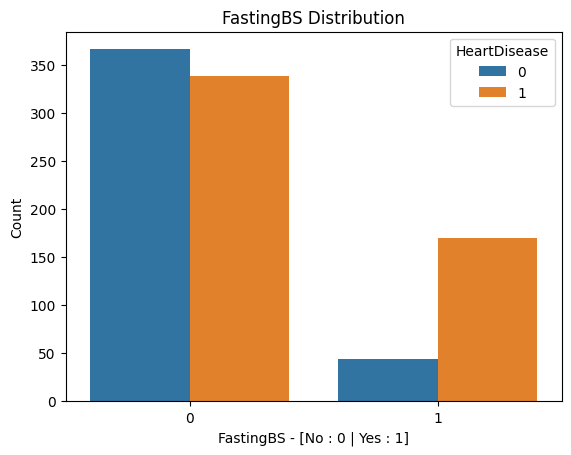

In [26]:
sns.countplot(x='FastingBS', data=heart_df, hue='HeartDisease')
plt.title('FastingBS Distribution')
plt.xlabel('FastingBS - [No : 0 | Yes : 1]')
plt.ylabel('Count')
plt.show()

Countplot shows FastingBS has high risk of HeartDisease



Max heart rate and Heart Disease

Text(0.5, 1.0, 'MaxHR vs HeartDisease')

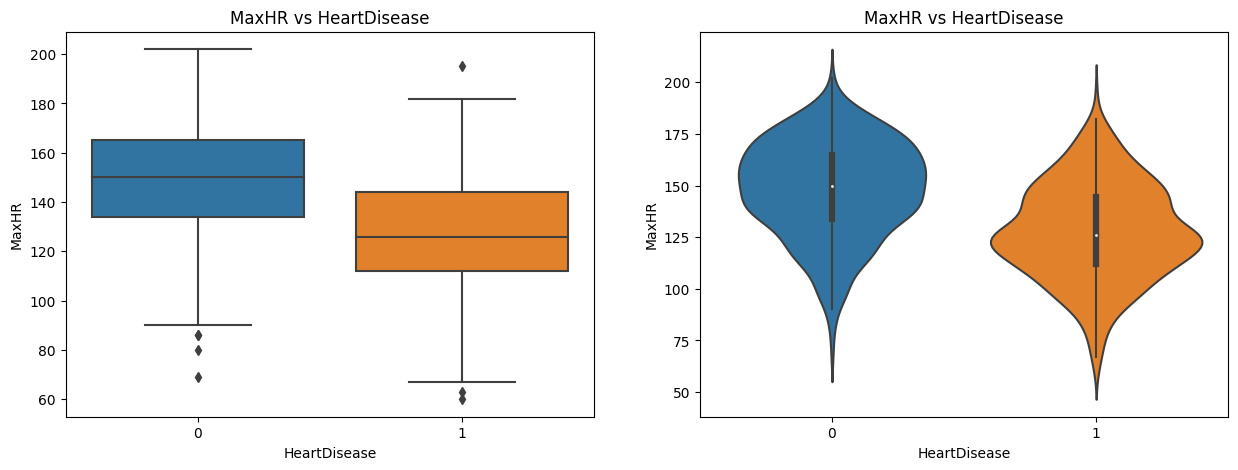

In [27]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='HeartDisease', y='MaxHR', data=heart_df, ax=ax[0]).set_title('MaxHR vs HeartDisease')
sns.violinplot(x='HeartDisease', y='MaxHR', data=heart_df, ax=ax[1]).set_title('MaxHR vs HeartDisease')

Oldpeak and Heart Disease


Text(0.5, 1.0, 'Oldpeak vs HeartDisease')

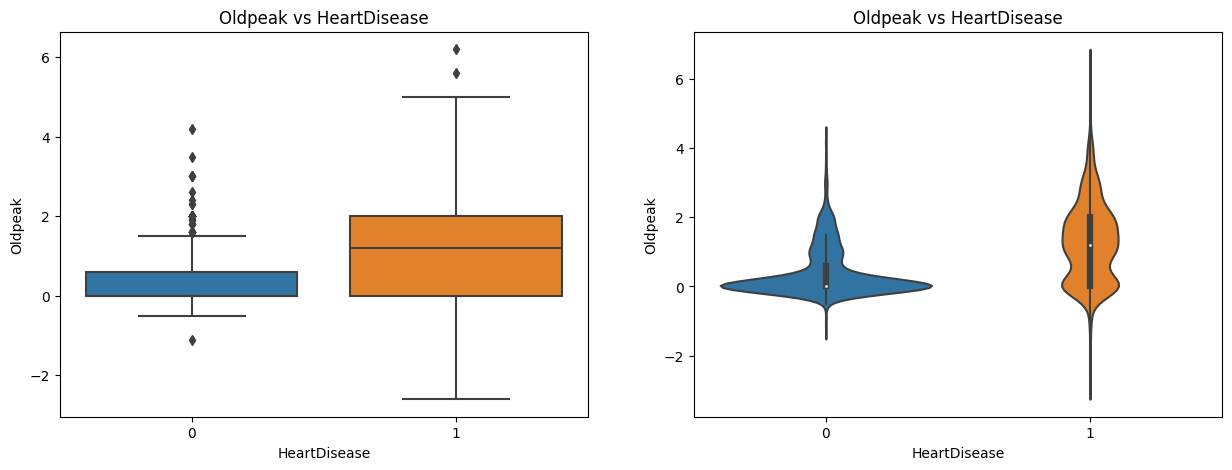

In [28]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='HeartDisease', y='Oldpeak', data=heart_df, ax=ax[0]).set_title('Oldpeak vs HeartDisease')
sns.violinplot(x='HeartDisease', y='Oldpeak', data=heart_df, ax=ax[1]).set_title('Oldpeak vs HeartDisease')

Exercise-induced angina and Heart Disease


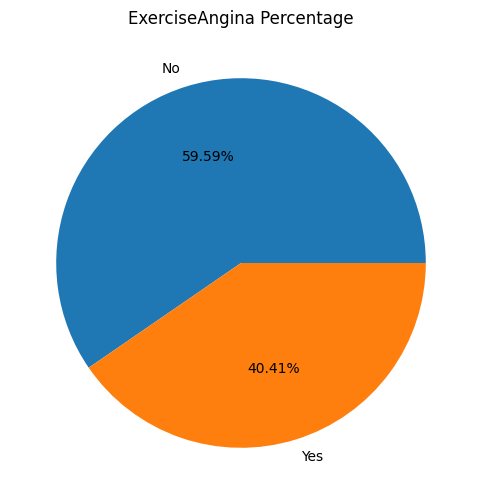

In [29]:
plt.figure(figsize=(10,6))
plt.pie(heart_df['ExerciseAngina'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%')
plt.title('ExerciseAngina Percentage')
plt.show()

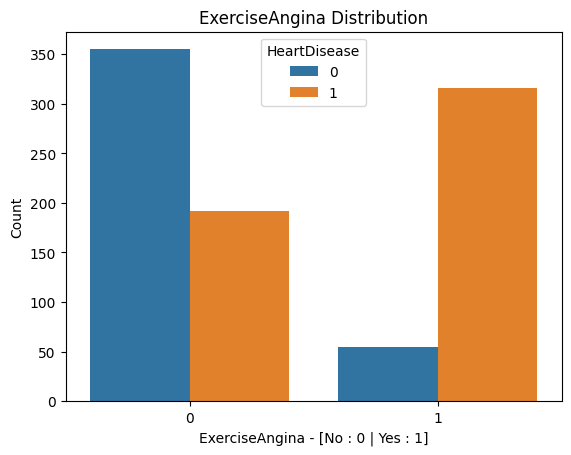

In [30]:
sns.countplot(x='ExerciseAngina', data=heart_df, hue='HeartDisease')
plt.title('ExerciseAngina Distribution')
plt.xlabel('ExerciseAngina - [No : 0 | Yes : 1]')
plt.ylabel('Count')
plt.show()

ST_Slope and Heart Disease

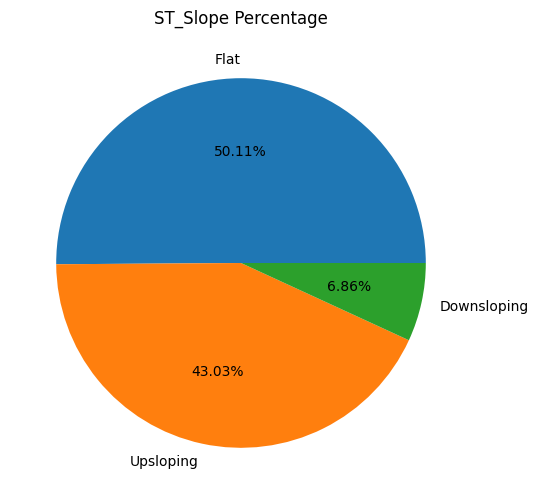

In [31]:
plt.figure(figsize=(10,6))
plt.pie(heart_df['ST_Slope'].value_counts(), labels=['Flat','Upsloping', 'Downsloping'], autopct='%1.2f%%')
plt.title('ST_Slope Percentage')
plt.show()

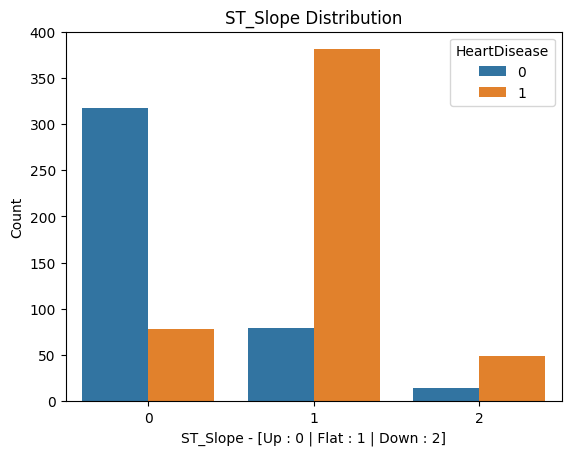

In [32]:
sns.countplot(x='ST_Slope', data=heart_df, hue='HeartDisease')
plt.title('ST_Slope Distribution')
plt.xlabel('ST_Slope - [Up : 0 | Flat : 1 | Down : 2]')
plt.ylabel('Count')
plt.show()
